In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from funs import read_data, prepare_data, sort_result, plot_result

import random


data_2d

In [2]:
data_2d = read_data("data_2d.csv")
data_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [3]:
X_2d, y_2d = prepare_data(data_2d)

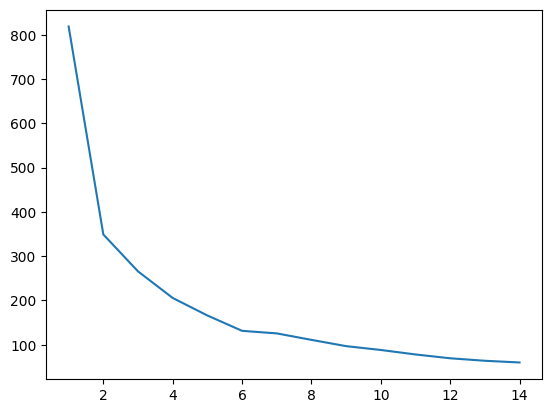

In [4]:
clusters_nums = list(range(1, 15))
errors = []

for clusters_num in clusters_nums:
    kmeans_2d_currrent = KMeans(n_clusters=clusters_num, random_state=13).fit(X_2d)
    errors.append(kmeans_2d_currrent.inertia_)

plt.plot(clusters_nums, errors)
plt.show()


Zarówno z metody łokciowej, jak i wiedzy o danych wynika, że liczba klastrów K = 2

In [5]:
clusters_num = 2

kmeans_2d_1 = KMeans(n_clusters=clusters_num, random_state=13)
kmeans_2d_1.fit(X_2d)

KMeans(n_clusters=2, random_state=13)

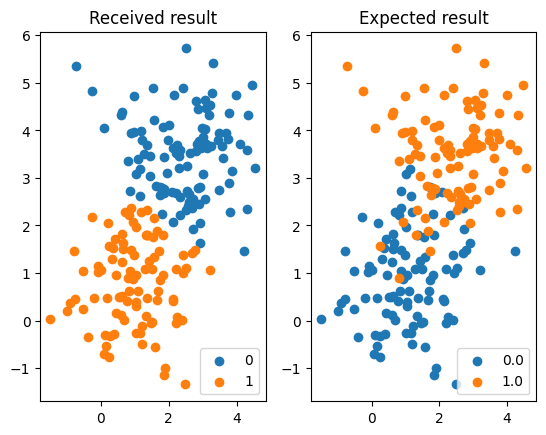

In [6]:
sorted_result_2d = sort_result(X_2d, kmeans_2d_1.labels_)
plt.figure(num=2)
plt.subplot(1,2,1)
plt.title("Received result")
plot_result(sorted_result_2d)
sorted_expected_2d = sort_result(X_2d, y_2d)
plt.subplot(1,2,2)
plt.title("Expected result")
plot_result(sorted_expected_2d)
plt.show()

Rezultaty są podobne. Odwrócone są nazwy klastrów. Aby rozwiązać ten problem dla K=2 obliczenia wykonano ponownie, przyjmując początkowe położenia centroidów. Przyjęto dowolną próbkę należącą do klastra jako początkowy centroid tego klastra. Oczekuje się, że dzięki temu otrzymana zostanie zbieżność w nazewnictwie klastów.

In [7]:
init_centroids_2d = []

for value in sorted_expected_2d.values():
    init_centroids_2d.append(value[0])

kmeans_2d_2 = KMeans(n_clusters=clusters_num, init=init_centroids_2d)
kmeans_2d_2.fit(X_2d)
sorted_result_2d = sort_result(X_2d, kmeans_2d_2.labels_)

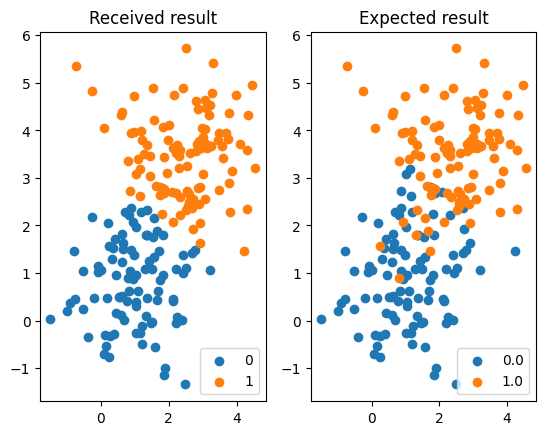

In [8]:
plt.figure(num=3)
plt.subplot(1,2,1)
plt.title("Received result")
plot_result(sorted_result_2d)
plt.subplot(1,2,2)
plt.title("Expected result")
plot_result(sorted_expected_2d)
plt.show()

Uzyskane rozbieżności pomiędzy wynikiem oczekiwanym (przez zbiór danych), a otrzymanym są całkowicie zrozumiałe w kontekście klasteryzacji metodą k-średnich. Użyskany rezultat metodą k-średnich jest wizualnie sensowny.

mnist

In [9]:
data_mnist = read_data("mnist.csv")
data_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_mnist, y_mnist = prepare_data(data_mnist)
samples_num = len(y_mnist)

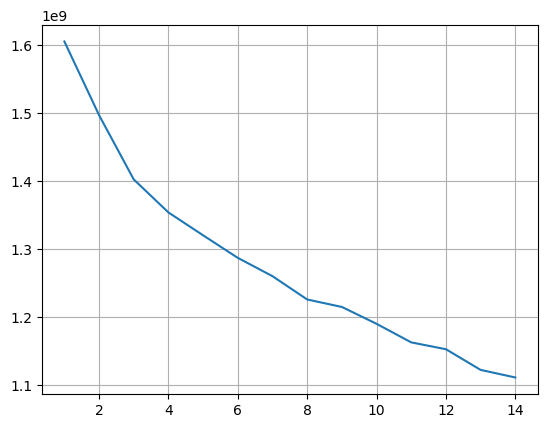

In [11]:
clusters_nums = list(range(1, 15))

errors = []

for clusters_num in clusters_nums:
    kmeans_mnist_currrent = KMeans(n_clusters=clusters_num, init='k-means++', random_state=13).fit(X_mnist)
    errors.append(kmeans_mnist_currrent.inertia_)

plt.plot(clusters_nums, errors)
plt.grid(True)
plt.show()

Z metody łokciowej nic za bardzo nie wynika ale znając naturę zbioru danych przyjęto 10 klastrów. Aby uniknąć rozbieżności w nazewnictwie, przyjęto początkowe położenia centroidów, analogicznie jak w przykładzie poprzednim.

In [12]:
clusters_num = 10

sorted_expected_mnist = sort_result(X_mnist, y_mnist)

init_centroids_mnist = []

for value in sorted_expected_mnist.values():
    init_centroids_mnist.append(value[0])


kmeans_mnist = KMeans(n_clusters=clusters_num, init=init_centroids_mnist)
kmeans_mnist.fit(X_mnist)

KMeans(init=[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253,
       107...
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 218,
       254,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  30, 254, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 186, 244,  42,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  14, 223,  78,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int64)],
       n_clusters=10)

In [13]:
X_mnist_standardized = StandardScaler().fit_transform(X_mnist)
pca_mnist = PCA(n_components=2)
X_mnist_tranformed = pca_mnist.fit_transform(X_mnist_standardized)


sorted_result_mnist = sort_result(X_mnist_tranformed, kmeans_mnist.labels_)
sorted_mnist_expected = sort_result(X_mnist_tranformed, y_mnist)


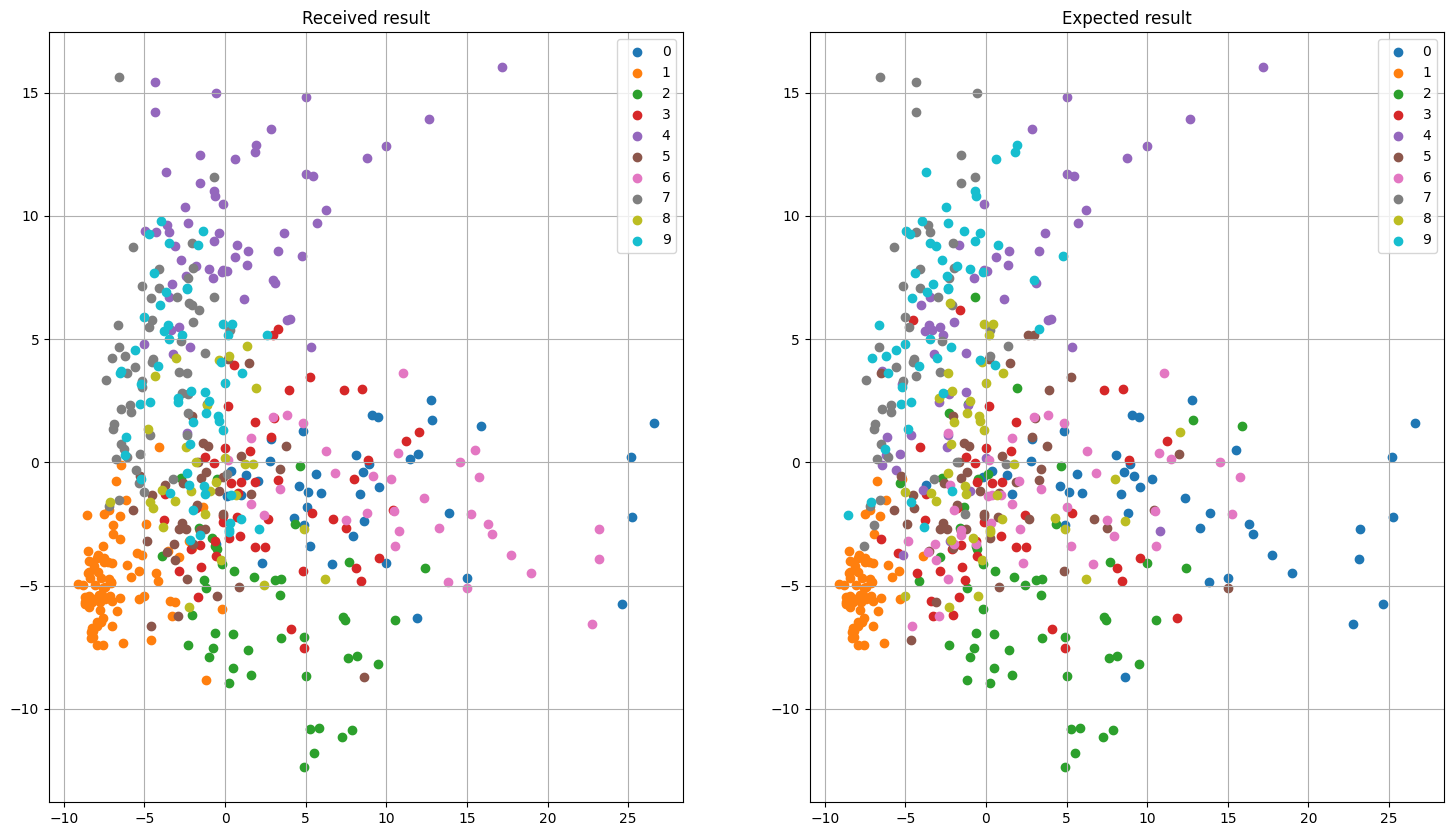

In [14]:
plt.figure(num=5, figsize=(18, 10))
plt.subplot(1,2,1)
plt.grid(True)
plt.title("Received result")
plot_result(sorted_result_mnist)
plt.subplot(1,2,2)
plt.grid(True)
plt.title("Expected result")
plot_result(sorted_mnist_expected)
plt.show()

Wynik metody k-średnich wydaje się być dość zbliżony do oczekiwanego, choć widocznych jest wiele różnic.

In [15]:
error = (list(y_mnist == kmeans_mnist.labels_).count(False))/samples_num
print(error)

0.438


Z uwagi na duży błąd dopasowania, będą poszukiwane lepsze centroidy startowe.

In [33]:

for i in range(500):

    current_init_centroids_mnist = []

    for key, value in sorted_expected_mnist.items():
        # print(key, value.shape)
        choosen_sample = random.choice(list(value))
        # print(choosen_sample)

        current_init_centroids_mnist.append(choosen_sample)

    kmeans_mnist = KMeans(n_clusters=clusters_num, init=current_init_centroids_mnist)
    kmeans_mnist.fit(X_mnist)

    current_error = (list(y_mnist == kmeans_mnist.labels_).count(False))/samples_num

    if current_error < error:
        error = current_error
        init_centroids_mnist = current_init_centroids_mnist
        labels_mnist = kmeans_mnist.labels_


print(f"error = {error}")

    
    

error = 0.308


Powyższą pętlę uruchomiono wielokrotnie, próbując uzyskać poprawę dopasowania próbek. Okazało się jednak, że kilkukrotne uruchamianie pętli nie dało znaczącej poprawy w stosunku do jednokrotnego uruchomienia.

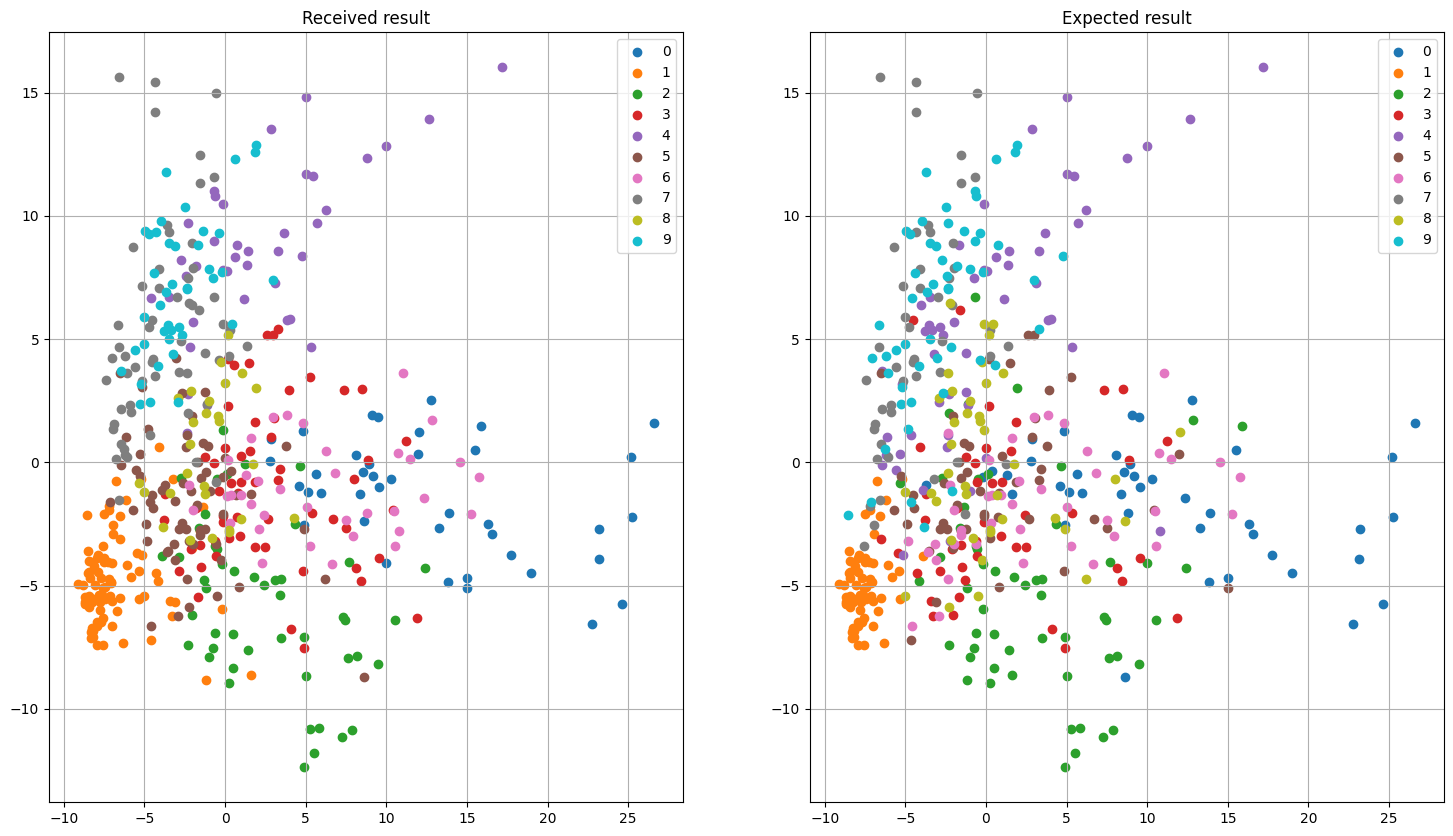

In [24]:
sorted_result_mnist = sort_result(X_mnist_tranformed, labels_mnist)

plt.figure(num=5, figsize=(18, 10))
plt.subplot(1,2,1)
plt.grid(True)
plt.title("Received result")
plot_result(sorted_result_mnist)
plt.subplot(1,2,2)
plt.grid(True)
plt.title("Expected result")
plot_result(sorted_mnist_expected)
plt.show()

Teoretycznie udało się uzykać pewną poprawę wyników. Pomimo sporej części próbek dopasowanych niepoprawnie, wizualnie wyniki wydają się całkiem dobre.